Admissible Heuristic:
  Path Cost = 5, Path = ['A', 'C', 'D'], Nodes Explored = 3
Consistent Heuristic:
  Path Cost = 4, Path = ['A', 'B', 'C', 'D'], Nodes Explored = 4


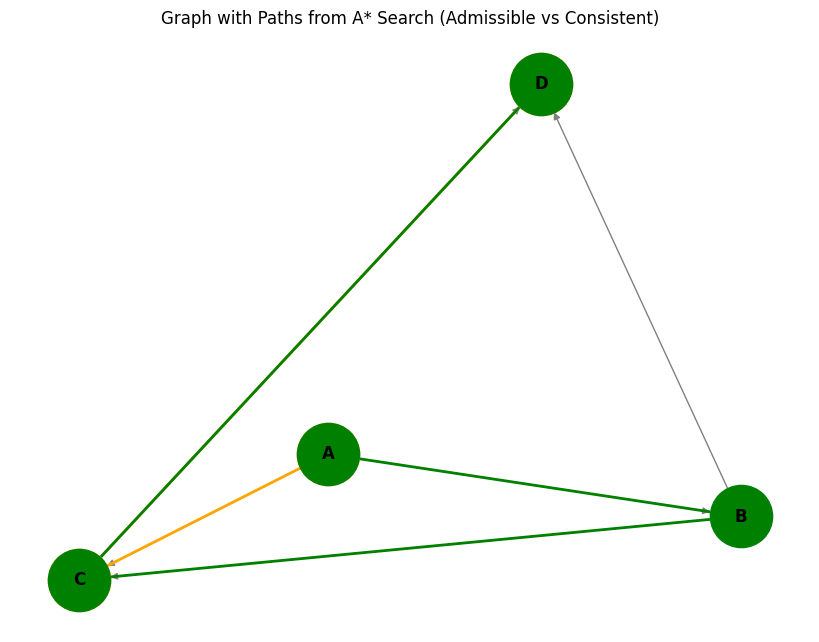

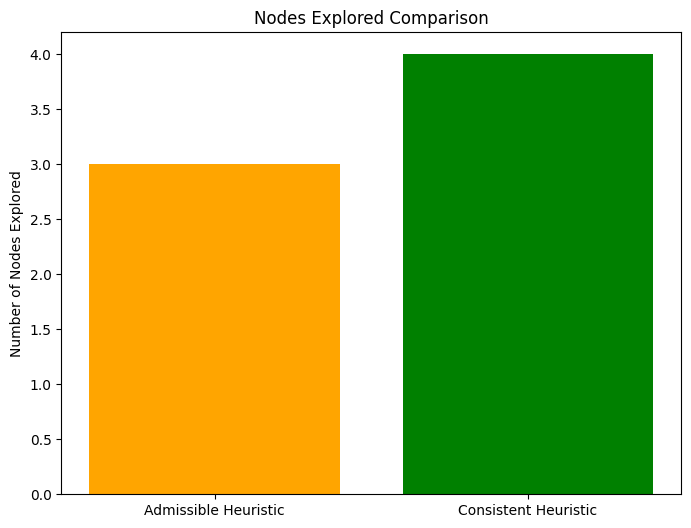

In [5]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# A* search with heuristics
def a_star_with_heuristics(graph, start, goal, heuristic): 
    pq = []  # Priority queue 
    heapq.heappush(pq, (0, start))  # (f(n), node) 
    visited = set() 
    cost_so_far = {start: 0} 
    path = []  # To store the explored path 

    while pq: 
        current_cost, current_node = heapq.heappop(pq) 

        if current_node in visited: 
            continue 
        visited.add(current_node) 
        path.append(current_node) 

        if current_node == goal: 
            return cost_so_far[current_node], path, len(visited) 

        for neighbor, weight in graph[current_node]: 
            new_cost = cost_so_far[current_node] + weight 
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]: 
                cost_so_far[neighbor] = new_cost 
                f_cost = new_cost + heuristic[neighbor] 
                heapq.heappush(pq, (f_cost, neighbor)) 

    return float("inf"), path, len(visited)  # If no path is found 

# Function to visualize the graph and paths
def visualize_graph(graph, start, goal, admissible_path, consistent_path):
    G = nx.DiGraph()

    # Add edges to the graph
    for node in graph:
        for neighbor, _ in graph[node]:
            G.add_edge(node, neighbor)
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight="bold", edge_color="gray")

    # Highlight the paths for both heuristics
    nx.draw_networkx_nodes(G, pos, nodelist=admissible_path, node_color="orange", node_size=2000)
    nx.draw_networkx_nodes(G, pos, nodelist=consistent_path, node_color="green", node_size=2000)

    # Draw edges for admissible path (orange) and consistent path (green)
    admissible_edges = list(zip(admissible_path, admissible_path[1:]))
    consistent_edges = list(zip(consistent_path, consistent_path[1:]))
    
    nx.draw_networkx_edges(G, pos, edgelist=admissible_edges, edge_color="orange", width=2)
    nx.draw_networkx_edges(G, pos, edgelist=consistent_edges, edge_color="green", width=2)

    # Display the visualization
    plt.title("Graph with Paths from A* Search (Admissible vs Consistent)")
    plt.show()

# Function to visualize the nodes explored
def visualize_explored_nodes(admissible_nodes, consistent_nodes):
    plt.figure(figsize=(8, 6))
    plt.bar(['Admissible Heuristic', 'Consistent Heuristic'], [admissible_nodes, consistent_nodes], color=['orange', 'green'])
    plt.title("Nodes Explored Comparison")
    plt.ylabel("Number of Nodes Explored")
    plt.show()

# Heuristic tuning analysis function
def heuristic_tuning_analysis(): 
    graph = { 
        "A": [("B", 1), ("C", 4)], 
        "B": [("C", 2), ("D", 5)], 
        "C": [("D", 1)], 
        "D": [] 
    } 

    # Admissible Heuristic (Underestimates or exact) 
    admissible_heuristic = { 
        "A": 7, 
        "B": 6, 
        "C": 2, 
        "D": 0 
    } 

    # Consistent Heuristic (h(x) <= c(x, y) + h(y)) 
    consistent_heuristic = { 
        "A": 6, 
        "B": 4, 
        "C": 2, 
        "D": 0 
    } 

    start, goal = "A", "D"

    # Admissible Heuristic 
    admissible_cost, admissible_path, admissible_nodes = a_star_with_heuristics(graph, start, goal, admissible_heuristic) 
    # Consistent Heuristic 
    consistent_cost, consistent_path, consistent_nodes = a_star_with_heuristics(graph, start, goal, consistent_heuristic) 

    # Results
    print(f"Admissible Heuristic:")
    print(f"  Path Cost = {admissible_cost}, Path = {admissible_path}, Nodes Explored = {admissible_nodes}") 
    print(f"Consistent Heuristic:")
    print(f"  Path Cost = {consistent_cost}, Path = {consistent_path}, Nodes Explored = {consistent_nodes}") 

    # Visualizations
    visualize_graph(graph, start, goal, admissible_path, consistent_path)
    visualize_explored_nodes(admissible_nodes, consistent_nodes)

# Example usage
heuristic_tuning_analysis()
